In [2]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


blastn -task blastn -evalue 10 -query /home/juan/Desktop/juan/bio/mirna_mrcv/data/mirna.y.fasta -subject /home/juan/Desktop/juan/bio/mirna_mite/data/mature.fa -outfmt '6 qseqid sseqid qstart qend sstart send mismatch gaps pident evalue length qlen slen qcovs score' > /home/juan/Desktop/juan/bio/mirna_mrcv/data/mirna.y.mature.csv

In [3]:
libs = {}
libs['SRR1197125'] = 'germinating seed embryo'
libs['SRR1197126'] = 'seedling leaf'
libs['SRR1197127'] = 'seedling root'
#libs['SRR1197128'] = 'grain of 8 days after pollination'
path_transcripts = '/home/juan/Desktop/juan/bio/mirna_mite/data/fixed.cdna.all.fa'
path_genes_deg = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/DEG-normalized.csv'
path_annotation = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/iwgsc_refseqv1.0_FunctionalAnnotation_v1__HCgenes_v1.0.TAB'
path_mirnas_deg = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/mirna.deg.csv'
path_mirnas = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/results.valid.csv'
path_libs = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/sun_deg/%s'
path_transcripts_res = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/targets.fa'
path_res = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/res.csv'
path_mirbase_res = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/mirna.y.mature.csv'

In [4]:
dfs = []
for lib,description in libs.items():
    path_lib = path_libs % lib
    df = pd.read_csv(path_lib, sep='\t',comment='#')
    df['lib'] = lib
    df['lib_description'] = description
    dfs.append(df)

In [5]:
df_cleave = pd.concat(dfs)
print(len(df_cleave.index))

1350


In [6]:
df_cleave.drop_duplicates(['SiteID','Query'], inplace=True)
print(len(df_cleave.index))

1175


In [7]:
df_cleave = df_cleave.reset_index(drop=True)

In [8]:
print(len(df_cleave[df_cleave.DegradomeCategory == 0].index))


45


In [9]:
df_cleave.head(2)

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,lib_description
0,TraesCS1A02G004200.1:338,Cluster_5906 2A:485771022-485771154 l2fc:-0.91...,TraesCS1A02G004200.1,325,347,338,-40.7,-27.1,0.665848,12.5,"3-11,345-337;12-18,333-327","1-2,347-346[UP5];x-x,336-334[BULt];19-20,326-3...",..(((((((...(((((((((..&..)))))))))---)))))))..,AAGGCCAAGUAUGUGACCGUCGU&UAGGCGGUCAC---CUUGGCUAG,4,1.0,/home/juan/Desktop/juan/bio/mirna_mrcv/data/su...,SRR1197125,germinating seed embryo
1,TraesCS1A02G142500.1:1345,Cluster_30793 6D:95858420-95858697 l2fc:0.581922,TraesCS1A02G142500.1,1333,1354,1345,-43.0,-28.3,0.658140,8.0,"2-11,1353-1344;13-20,1341-1334","1-1,1354-1354[UP5];12-12,1343-1342[AILt];21-21...",.((((((((..((((((((((.&.))))))))))-.)))))))).,ACUUGAACAGACACGGAGCUGA&GCGGCUCUGUG-GUGUUCAAGC,2,1.0,/home/juan/Desktop/juan/bio/mirna_mrcv/data/su...,SRR1197125,germinating seed embryo


In [10]:
#df_cleave = df_cleave[df_cleave.DegradomeCategory < 3]

In [11]:
df_cleave = df_cleave[['Query','Transcript','DegradomeCategory','DegradomePval','TStart','TStop','TSlice','lib','lib_description']]


In [12]:
df_cleave['Query'] = df_cleave['Query'].str.split(' ').str[0]

In [13]:
df_cleave.head(2)

,Query,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,lib_description
0,Cluster_5906,TraesCS1A02G004200.1,4,1.0,325,347,338,SRR1197125,germinating seed embryo
1,Cluster_30793,TraesCS1A02G142500.1,2,1.0,1333,1354,1345,SRR1197125,germinating seed embryo


In [14]:
df_mirs_degs = pd.read_csv(path_mirnas_deg, sep=',')

In [15]:
df_mirs_degs.head(2)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,X21dpiR1C.trimmed,X21dpiR3C.trimmed,X21dpiR1T.trimmed,X21dpiR3T.trimmed
0,Cluster_9889,298.598043,-1.471187,0.264059,-5.571425,2.526645e-08,0.000002,417.884204,459.336142,137.863421,179.308403
1,Cluster_35781,411.843895,-0.908261,0.236510,-3.840258,1.229050e-04,0.005899,583.212178,491.732645,306.089619,266.341137


In [16]:
df_mirs_degs = df_mirs_degs[['Gene','log2FoldChange']]

In [17]:
df_mirs_degs.head(2)

,Gene,log2FoldChange
0,Cluster_9889,-1.471187
1,Cluster_35781,-0.908261


In [18]:
df_mirs = pd.read_csv(path_mirnas, sep='\t')
df_mirs.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24
0,1A:309399489-309399664,Cluster_872,176,553,4.340,1,0.002,-,ACGGCAUAGAGGCACUGCAAA,327,...,21,Y,-1.0,7,1,35,440,61,5,4
1,1A:419025472-419025570,Cluster_1015,99,384,3.014,20,1.000,+,CGAAUGUAUUUUUUAUGGCUUG,249,...,22,Y,-1.0,2,3,27,83,264,3,2


In [19]:
df_annotation = pd.read_csv(path_annotation, sep='\t')
print(len(df_annotation.index))
df_annotation.head(2)

137052


,Gene-ID,is_repr,AHRD-Quality-Code,Blast-Hit-Accession,Human-Readable-Description,Pfam-IDs-(Description),Interpro-IDs-(Description),GO-IDs-(Description)-via-Interpro,Gene-or-TE-TE?-U (via-function),Pfam-IDs,Interpro-IDs,GO-IDs-via-Interpro
0,TraesCS1A01G000100.1,1,-**,sp|P0AGJ7|TRML_ECOLI,tRNA (cytidine(34)-2'-O)-methyltransferase,NaN,NaN,NaN,G,NaN,NaN,NaN
1,TraesCS1A01G000200.1,1,--*,sp|Q9NS15|LTBP3_HUMAN,Latent-transforming growth factor beta-binding...,NaN,NaN,NaN,G,NaN,NaN,NaN


In [20]:
df_annotation = df_annotation[['Gene-ID','Human-Readable-Description']]

In [21]:
df_annotation['Gene-ID'] = df_annotation['Gene-ID'].replace("01G", "02G",regex = True) 

In [22]:
df_annotation.head(2)

,Gene-ID,Human-Readable-Description
0,TraesCS1A02G000100.1,tRNA (cytidine(34)-2'-O)-methyltransferase
1,TraesCS1A02G000200.1,Latent-transforming growth factor beta-binding...


In [23]:
df_genes_deg = pd.read_csv(path_genes_deg, sep=',')
print(len(df_genes_deg.index))
df_genes_deg.head(2)

3019


,Unnamed: 0,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,C1.counts.txt,C2.counts.txt,C3.counts.txt,C4.counts.txt,T1.counts.txt,T2.counts.txt,T3.counts.txt,T4.counts.txt
0,1,gene:TraesCS2B02G286300,320.013057,-2.445058,0.225052,-10.864391,1.703566e-27,5.369742e-23,582.257421,553.695714,476.353565,549.686360,77.245985,81.333777,93.617622,145.914014
1,2,gene:TraesCS2B02G336800,2294.525203,2.909847,0.268059,10.855257,1.882766e-27,5.369742e-23,532.840739,512.938938,500.171243,609.940442,4976.988116,5270.112921,2148.061490,3805.147731


In [24]:
df_genes_deg = df_genes_deg[['gene','log2FoldChange']]
df_genes_deg['gene'] = df_genes_deg['gene'].str.split('gene:').str[1]
df_genes_deg.rename(columns={'log2FoldChange':'gene_deg_log2FoldChange'}, inplace=True)
df_genes_deg.head(2)

,gene,gene_deg_log2FoldChange
0,TraesCS2B02G286300,-2.445058
1,TraesCS2B02G336800,2.909847


In [25]:
#merge df_cleave df_mirs df_mirs_degs df_annotation

In [26]:
df_mirs_degs.head(2)

,Gene,log2FoldChange
0,Cluster_9889,-1.471187
1,Cluster_35781,-0.908261


In [27]:
df_1 = pd.merge(df_mirs, df_mirs_degs, left_on='Name', right_on='Gene')
print(len(df_1.index))
df_1.drop(['Gene'], axis=1, inplace=True)
df_1.head(3)

11


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,log2FoldChange
0,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.000,+,UAGGCGGUCACCUUGGCUAG,2883,...,Y,-1.0,1080,3,4050,798,52,0,2,-0.915816
1,2A:652328872-652329011,Cluster_6309,140,1185,9.300,1,0.001,-,UGCCAAAGGAGAGUUGCCCUG,1136,...,Y,-1.0,14,0,3,1155,11,2,0,-1.201318
2,2A:707747480-707747579,Cluster_6516,100,1271,9.975,1,0.999,+,UGGACGAGGAUGUGCAGCUGC,988,...,Y,-1.0,9,2,2,1256,2,0,0,0.908011


In [28]:
df_cleave.head(2)

,Query,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,lib_description
0,Cluster_5906,TraesCS1A02G004200.1,4,1.0,325,347,338,SRR1197125,germinating seed embryo
1,Cluster_30793,TraesCS1A02G142500.1,2,1.0,1333,1354,1345,SRR1197125,germinating seed embryo


In [29]:
df_cleave['gene'] = df_cleave['Transcript'].str.split('.').str[0]

In [30]:
df_cleave.head(2)

,Query,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,lib_description,gene
0,Cluster_5906,TraesCS1A02G004200.1,4,1.0,325,347,338,SRR1197125,germinating seed embryo,TraesCS1A02G004200
1,Cluster_30793,TraesCS1A02G142500.1,2,1.0,1333,1354,1345,SRR1197125,germinating seed embryo,TraesCS1A02G142500


In [31]:
df_2 = pd.merge(df_1, df_cleave, left_on='Name', right_on='Query')
print(len(df_2.index))
df_2.drop(['Query'], axis=1, inplace=True)
df_2.head(10)

1175


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,log2FoldChange,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,lib_description,gene
0,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,-0.915816,TraesCS1A02G004200.1,4,1.000000,325,347,338,SRR1197125,germinating seed embryo,TraesCS1A02G004200
1,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,-0.915816,TraesCS1A02G308100.1,3,0.999774,2015,2034,2025,SRR1197125,germinating seed embryo,TraesCS1A02G308100
2,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,-0.915816,TraesCS1A02G308100.2,4,1.000000,2018,2037,2028,SRR1197125,germinating seed embryo,TraesCS1A02G308100
3,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,-0.915816,TraesCS1A02G350200.1,4,1.000000,1026,1049,1037,SRR1197125,germinating seed embryo,TraesCS1A02G350200
4,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,-0.915816,TraesCS1A02G350200.4,4,1.000000,855,878,866,SRR1197125,germinating seed embryo,TraesCS1A02G350200
5,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,-0.915816,TraesCS1B02G005600.1,3,1.000000,1168,1190,1181,SRR1197125,germinating seed embryo,TraesCS1B02G005600
6,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,-0.915816,TraesCS1B02G018900.1,2,1.000000,658,677,668,SRR1197125,germinating seed embryo,TraesCS1B02G018900
7,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,-0.915816,TraesCS1B02G202700.1,4,1.000000,1407,1427,1418,SRR1197125,germinating seed embryo,TraesCS1B02G202700
8,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,-0.915816,TraesCS1B02G364500.3,3,0.999990,1025,1048,1036,SRR1197125,germinating seed embryo,TraesCS1B02G364500
9,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,-0.915816,TraesCS1B02G364500.4,3,0.999982,956,979,967,SRR1197125,germinating seed embryo,TraesCS1B02G364500


In [32]:
df_3 = pd.merge(df_2, df_annotation, left_on='Transcript', right_on='Gene-ID')
print(len(df_3.index))
df_3.drop(['Gene-ID'], axis=1, inplace=True)
df_3.head(10)

1164


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,lib_description,gene,Human-Readable-Description
0,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1A02G004200.1,4,1.000000,325,347,338,SRR1197125,germinating seed embryo,TraesCS1A02G004200,SNF1-related protein kinase regulatory subunit...
1,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1A02G308100.1,3,0.999774,2015,2034,2025,SRR1197125,germinating seed embryo,TraesCS1A02G308100,MYB transcription factor
2,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1A02G308100.2,4,1.000000,2018,2037,2028,SRR1197125,germinating seed embryo,TraesCS1A02G308100,MYB transcription factor
3,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1A02G350200.1,4,1.000000,1026,1049,1037,SRR1197125,germinating seed embryo,TraesCS1A02G350200,Tubulin alpha chain
4,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1A02G350200.4,4,1.000000,855,878,866,SRR1197125,germinating seed embryo,TraesCS1A02G350200,Tubulin alpha chain
5,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1B02G005600.1,3,1.000000,1168,1190,1181,SRR1197125,germinating seed embryo,TraesCS1B02G005600,SNF1-related protein kinase regulatory subunit...
6,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1B02G018900.1,2,1.000000,658,677,668,SRR1197125,germinating seed embryo,TraesCS1B02G018900,"Ras-related protein, expressed"
7,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1B02G202700.1,4,1.000000,1407,1427,1418,SRR1197125,germinating seed embryo,TraesCS1B02G202700,Aquaporin-1
8,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1B02G364500.3,3,0.999990,1025,1048,1036,SRR1197125,germinating seed embryo,TraesCS1B02G364500,Tubulin alpha chain
9,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1B02G364500.4,3,0.999982,956,979,967,SRR1197125,germinating seed embryo,TraesCS1B02G364500,Tubulin alpha chain


In [33]:
df_4 = pd.merge(df_3, df_genes_deg,how='left', left_on='gene', right_on='gene')
print(len(df_4.index))
df_4.head(2)

1164


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,lib_description,gene,Human-Readable-Description,gene_deg_log2FoldChange
0,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,4,1.000000,325,347,338,SRR1197125,germinating seed embryo,TraesCS1A02G004200,SNF1-related protein kinase regulatory subunit...,NaN
1,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,3,0.999774,2015,2034,2025,SRR1197125,germinating seed embryo,TraesCS1A02G308100,MYB transcription factor,NaN


In [50]:
df_mirbase = pd.read_csv(path_mirbase_res, sep="\t")
cols = ['qseqid','sseqid','qstart','qend','sstart','send','mismatch','gaps','pident','evalue','length','qlen','slen','qcovs','score']
df_mirbase.columns = cols
print(len(df_mirbase.index))
df_mirbase.head(2)


447


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
0,Cluster_5906,sbi-miR169d-3p,3,20,2,19,0,0,100.000,0.00021,18,20,20,90,36
1,Cluster_5906,bdi-miR169h-3p,3,20,1,18,1,0,94.444,0.00900,18,20,19,90,30


In [51]:
allowed_mirbase_mismatches = 7
mirbase_qlen = 7


In [52]:
df_mirbase = df_mirbase[df_mirbase.length > df_mirbase.qlen - mirbase_qlen]
print(len(df_mirbase.index))


426


In [53]:
df_mirbase = df_mirbase[df_mirbase.mismatch + df_mirbase.gaps <= allowed_mirbase_mismatches]
print(len(df_mirbase.index))


426


In [54]:
len(df_mirbase.qseqid.unique().tolist())


10

In [57]:
df_mirbase = df_mirbase.loc[df_mirbase.groupby("qseqid")["score"].idxmax()]

In [61]:
print(len(df_mirbase.index))
df_mirbase.head(2)


10


,qseqid,sseqid
228,Cluster_10582,tae-miR9776
232,Cluster_17243,bdi-miR169d


In [65]:
df_mirbase = df_mirbase[['qseqid','sseqid']]
df_mirbase.rename(columns={'sseqid':'mirbase'})

,qseqid,mirbase
228,Cluster_10582,tae-miR9776
232,Cluster_17243,bdi-miR169d
418,Cluster_19641,ata-miR9674a-5p
426,Cluster_33800,ata-miR5200-3p
433,Cluster_35781,ata-miR5200-3p
440,Cluster_35783,ata-miR5200-3p
0,Cluster_5906,sbi-miR169d-3p
5,Cluster_6309,aof-miR399a
217,Cluster_6516,tae-miR9776
221,Cluster_9889,ata-miR169c-3p


In [66]:
print(len(df_mirbase.index))
df_mirbase.head(2)


10


,qseqid,sseqid
228,Cluster_10582,tae-miR9776
232,Cluster_17243,bdi-miR169d


In [67]:
df_5 = pd.merge(df_4, df_mirbase, how='left', left_on='Name', right_on='qseqid')
df_5.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,TStart,TStop,TSlice,lib,lib_description,gene,Human-Readable-Description,gene_deg_log2FoldChange,qseqid,sseqid
0,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,325,347,338,SRR1197125,germinating seed embryo,TraesCS1A02G004200,SNF1-related protein kinase regulatory subunit...,NaN,Cluster_5906,sbi-miR169d-3p
1,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,2015,2034,2025,SRR1197125,germinating seed embryo,TraesCS1A02G308100,MYB transcription factor,NaN,Cluster_5906,sbi-miR169d-3p


In [68]:
df_5.to_csv(path_res, sep='\t', index=None)
path_res

'/home/juan/Desktop/juan/bio/mirna_mrcv/data/res.csv'

In [330]:
df_test = pd.merge(df_3, df_genes_deg, left_on='gene', right_on='gene')
df_test = df_test[['log2FoldChange','gene_deg_log2FoldChange']]
df_test.columns = ['Micro', 'Gene']
print(len(df_test.index))
df_test.head(2)
df_test.sort_values(by=['Micro','Gene'], inplace=True)

26


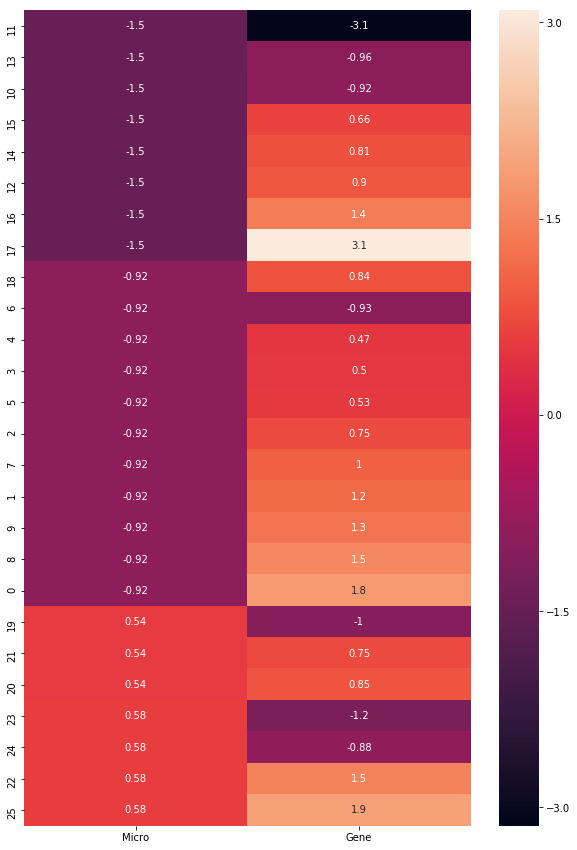

In [331]:
import numpy as np 

%matplotlib inline
fig, ax = plt.subplots(figsize=(10,15))         # Sample figsize in inches

sns.heatmap(df_test, annot=True, ax=ax)
